<h2>Water Potality Prediction Using Machine Learning Algorithms</h2>
<strong><i>Author: Mesuga, Reymond R.</i></strong><br>
<a href="https://github.com/Rey-commits" target="_blank">GitHub</a> | <a href="https://www.linkedin.com/in/reymond-r-21410/" target="_blank">LinkedIn</a> | <a href="https://rey-commits.web.app/" target="_blank">Website</a>

![](https://solarimpulse.com/img/topics/water-scarcity-header.jpg)

In [1]:
# !pip install pandas numpy plotly matplotlib seaborn --quiet

In [2]:
# !pip install opendatasets scikit-learn --quiet --upgrade

<strong>Importing the Required Libraries</strong>

In [3]:
import plotly.express as px
import opendatasets as od
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib
import os
%matplotlib inline

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 150)
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

<strong>Downloading the Data</strong><br>
The dataset is available at https://www.kaggle.com/adityakadiwal/water-potability .


We'll use the [`opendatasets` library](https://github.com/JovianML/opendatasets) to download the data from Kaggle directly within Jupyter. 

In [4]:
od.download("https://www.kaggle.com/adityakadiwal/water-potability")

Skipping, found downloaded files in "./water-potability" (use force=True to force download)


The dataset is downloaded and extracted to the folder `water-potability`.

In [5]:
os.listdir("water-potability")

['water_potability.csv']

The file `water_potability.csv` contains the data. Let's load it into a Pandas dataframe.

In [6]:
raw_df = pd.read_csv("water-potability/water_potability.csv")

In [7]:
raw_df

ph    Hardness        Solids  Chloramines     Sulfate  \
0          NaN  204.890455  20791.318981     7.300212  368.516441   
1     3.716080  129.422921  18630.057858     6.635246         NaN   
2     8.099124  224.236259  19909.541732     9.275884         NaN   
3     8.316766  214.373394  22018.417441     8.059332  356.886136   
4     9.092223  181.101509  17978.986339     6.546600  310.135738   
...        ...         ...           ...          ...         ...   
3271  4.668102  193.681735  47580.991603     7.166639  359.948574   
3272  7.808856  193.553212  17329.802160     8.061362         NaN   
3273  9.419510  175.762646  33155.578218     7.350233         NaN   
3274  5.126763  230.603758  11983.869376     6.303357         NaN   
3275  7.874671  195.102299  17404.177061     7.509306         NaN   

      Conductivity  Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       564.308654       10.379783        86.990970   2.963135           0  
1       592.885359       15.180013        56.329076   4.500656           0  
2       418.606213       16.868637        66.420093   3.055934           0  
3       363.266516       18.436524       100.341674   4.628771           0  
4       398.410813       11.558279        31.997993   4.075075           0  
...            ...             ...              ...        ...         ...  
3271    526.424171       13.894419        66.687695   4.435821           1  
3272    392.449580       19.903225              NaN   2.798243           1  
3273    432.044783       11.039070        69.845400   3.298875           1  
3274    402.883113       11.168946        77.488213   4.708658           1  
3275    327.459760       16.140368        78.698446   2.309149           1  

[3276 rows x 10 columns]

In [8]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB




Let's drop any rows where the value of the target column `Potability` is empty.

In [9]:
raw_df.dropna(subset=["Potability"], inplace=True)

In [10]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 281.5 KB


## Exploratory Data Analysis and Visualization

Before training a machine learning model, its always a good idea to explore the distributions of various columns and see how they are related to the target column. Let's explore and visualize the data using the Plotly, Matplotlib and Seaborn libraries. Follow these tutorials to learn how to use these libraries:

- https://jovian.ai/aakashns/python-matplotlib-data-visualization
- https://jovian.ai/aakashns/interactive-visualization-plotly
- https://jovian.ai/aakashns/dataviz-cheatsheet

<AxesSubplot:title={'center':'No. of Data for Potable and Non-Potable'}, xlabel='Potability', ylabel='count'>

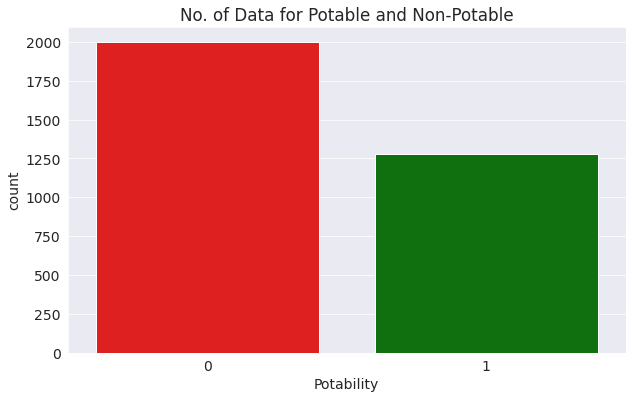

In [11]:
plt.title("No. of Data for Potable and Non-Potable")
sns.countplot(x=raw_df.Potability, palette=['r','g'])

There are more available data recorded from non-potable water than that of potable water. This unbalanced quantity might affect the result of the model but not in a distructive way. Using dataset with more non-potable can cause the model to be more sensitive when predicting water quailty. This helps to prevent human consumption of non-potable water. On the other hand, using unbalanced dataset with more non-potable than potable can cause misclassifcation of clean water when applied to real world. 

<AxesSubplot:xlabel='Potability', ylabel='ph'>

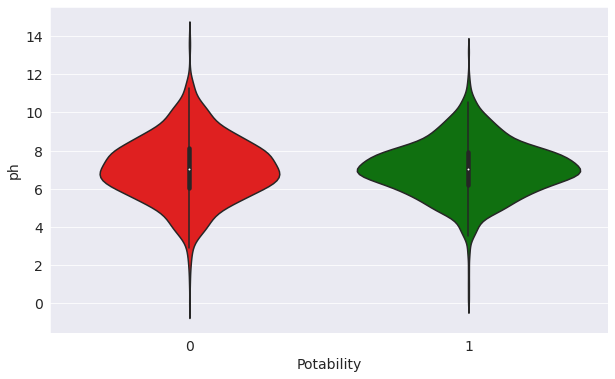

In [12]:
sns.violinplot(x="Potability", y="ph", data=raw_df, palette=['r','g'])

<AxesSubplot:xlabel='Potability', ylabel='Hardness'>

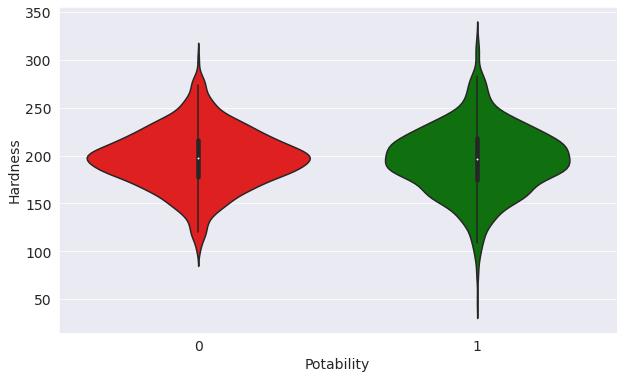

In [13]:
sns.violinplot(x="Potability", y="Hardness", data=raw_df, palette=['r','g'])

<AxesSubplot:xlabel='Potability', ylabel='Solids'>

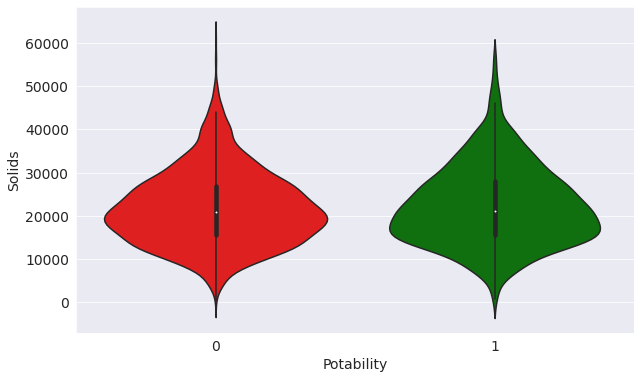

In [14]:
sns.violinplot(x="Potability", y="Solids", data=raw_df, palette=['r','g'])

<AxesSubplot:xlabel='Potability', ylabel='Sulfate'>

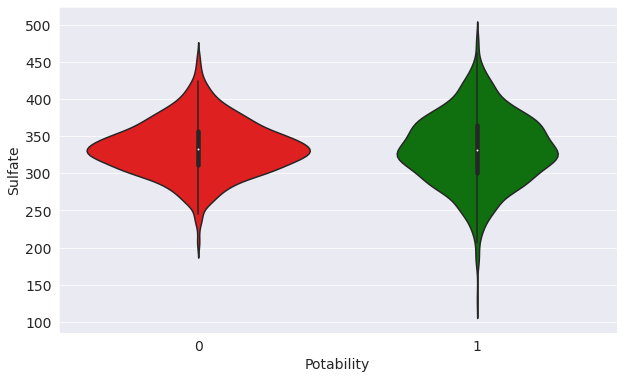

In [15]:
sns.violinplot(x="Potability", y="Sulfate", data=raw_df, palette=['r','g'])

<AxesSubplot:xlabel='Potability', ylabel='Chloramines'>

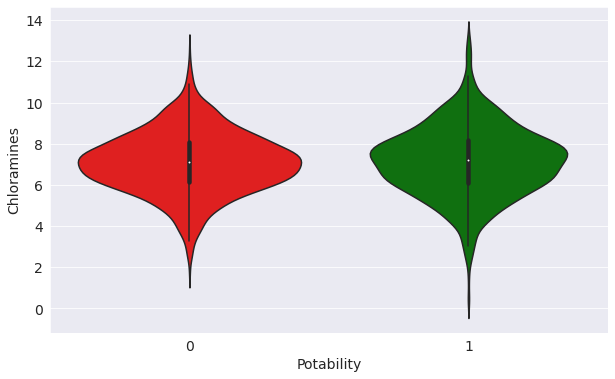

In [16]:
sns.violinplot(x="Potability", y="Chloramines", data=raw_df, palette=['r','g'])

<AxesSubplot:xlabel='Potability', ylabel='Conductivity'>

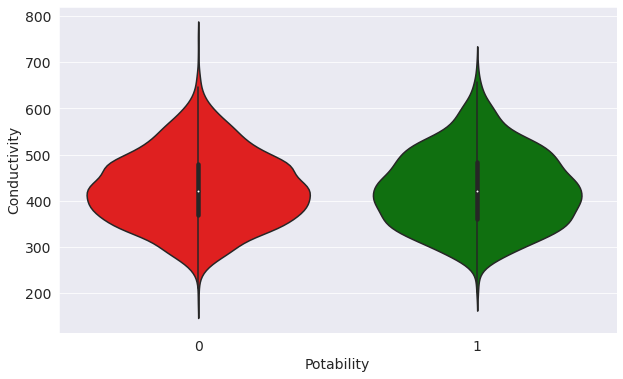

In [17]:
sns.violinplot(x="Potability", y="Conductivity", data=raw_df, palette=['r','g'])

<AxesSubplot:xlabel='Potability', ylabel='Organic_carbon'>

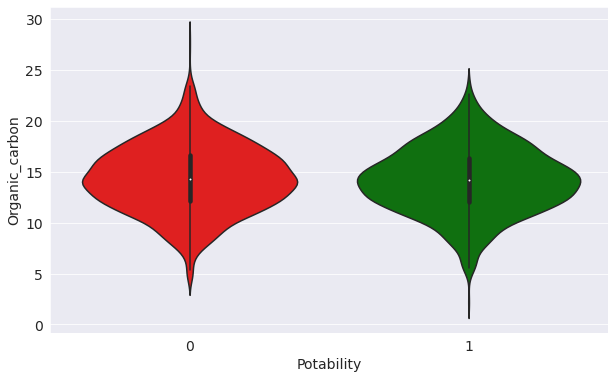

In [18]:
sns.violinplot(x="Potability", y="Organic_carbon", data=raw_df, palette=['r','g'])

<AxesSubplot:xlabel='Potability', ylabel='Trihalomethanes'>

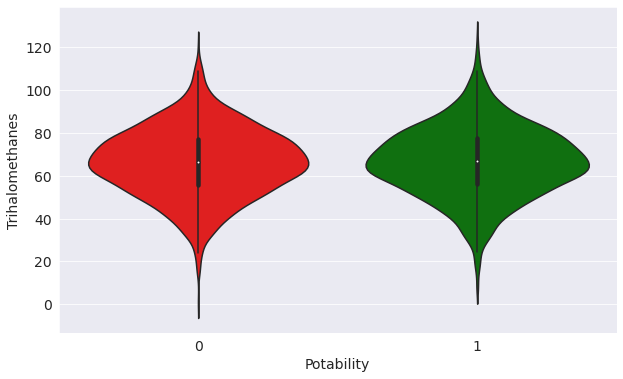

In [19]:
sns.violinplot(x="Potability", y="Trihalomethanes", data=raw_df, palette=['r','g'])

<AxesSubplot:xlabel='Potability', ylabel='Trihalomethanes'>

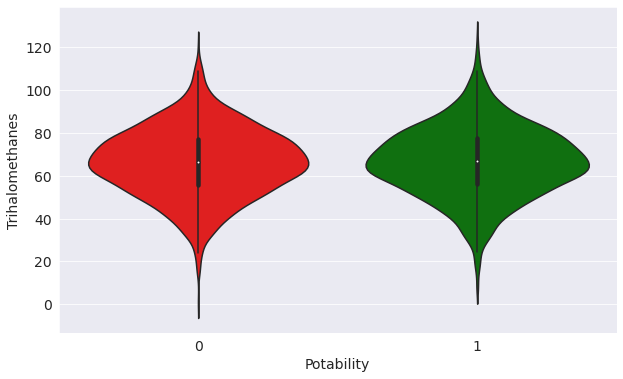

In [20]:
sns.violinplot(x="Potability", y="Trihalomethanes", data=raw_df, palette=['r','g'])

<AxesSubplot:xlabel='Potability', ylabel='Turbidity'>

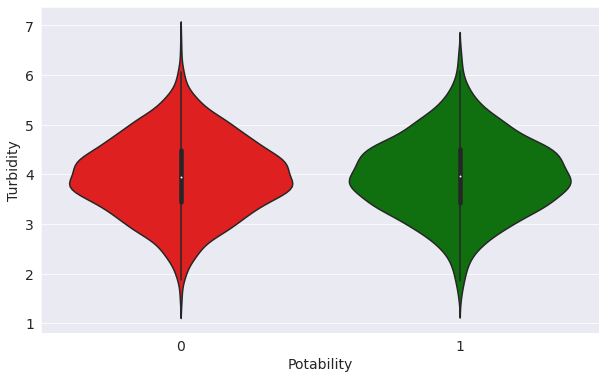

In [21]:
sns.violinplot(x="Potability", y="Turbidity", data=raw_df, palette=['r','g'])

Text(0.5, 1.0, 'Correlation Matrix')

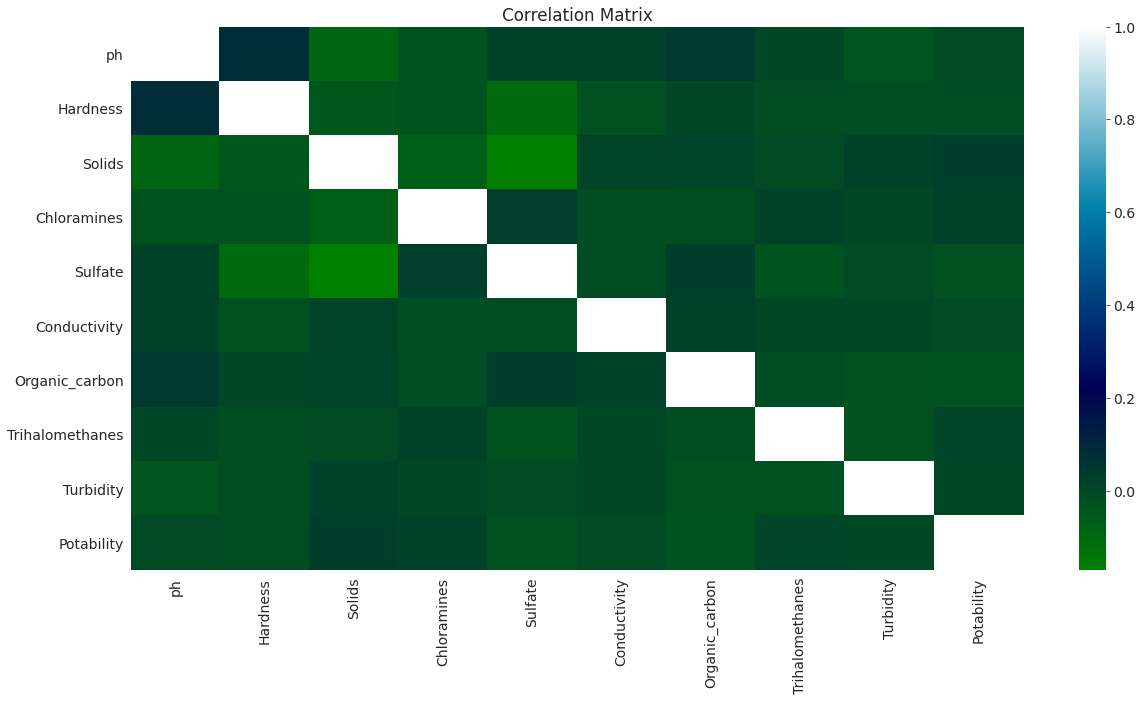

In [22]:
fig, ax = plt.subplots(figsize=(20,10))
sns.heatmap(raw_df.corr(), ax=ax, cmap="ocean")
plt.title("Correlation Matrix")

## Preparing the Data for Training

We'll perform the following steps to prepare the dataset for training:

1. Create a train/test/validation split
2. Identify input and target columns
3. Identify numeric and categorical columns
4. Impute (fill) missing numeric values
5. Scale numeric values to the $(0, 1)$ range
6. Encode categorical columns to one-hot vectors

## Training, Validation and Test Sets

While building real-world machine learning models, it is quite common to split the dataset into three parts:

1. **Training set** - used to train the model, i.e., compute the loss and adjust the model's weights using an optimization technique. 


2. **Validation set** - used to evaluate the model during training, tune model hyperparameters (optimization technique, regularization etc.), and pick the best version of the model. Picking a good validation set is essential for training models that generalize well. [Learn more here.](https://www.fast.ai/2017/11/13/validation-sets/)


3. **Test set** - used to compare different models or approaches and report the model's final accuracy. For many datasets, test sets are provided separately. The test set should reflect the kind of data the model will encounter in the real-world, as closely as feasible.


<img src="https://i.imgur.com/j8eITrK.png" width="480">


As a general rule of thumb you can use around 60% of the data for the training set, 20% for the validation set and 20% for the test set. If a separate test set is already provided, you can use a 75%-25% training-validation split.


When rows in the dataset have no inherent order, it's common practice to pick random subsets of rows for creating test and validation sets. This can be done using the `train_test_split` utility from `scikit-learn`. Learn more about it here: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
train_val_df, test_df = train_test_split(raw_df, test_size=0.1, random_state=42)
train_df, val_df = train_test_split(train_val_df, test_size=0.1112, random_state=42)

In [25]:
print('train_df.shape :', train_df.shape)
print('val_df.shape :', val_df.shape)
print('test_df.shape :', test_df.shape)

train_df.shape : (2620, 10)
val_df.shape : (328, 10)
test_df.shape : (328, 10)


<strong>Identifying Input and Target Columns</strong>

In [26]:
input_cols = list(train_df.columns)[0:-1]
target_col = "Potability"

In [27]:
print("input_cols =", input_cols)
print("------------------------------")
print("target_col =", target_col)

input_cols = ['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity', 'Organic_carbon', 'Trihalomethanes', 'Turbidity']
------------------------------
target_col = Potability


We can now create inputs and targets for the training, validation and test sets for further processing and model training.

In [28]:
train_inputs = train_df[input_cols].copy()
train_targets = train_df[target_col].copy()

In [29]:
val_inputs = val_df[input_cols].copy()
val_targets = val_df[target_col].copy()

In [30]:
test_inputs = test_df[input_cols].copy()
test_targets = test_df[target_col].copy()

In [31]:
numeric_cols = train_inputs.select_dtypes(include=np.number).columns.tolist()
numeric_cols, len(numeric_cols)

(['ph',
  'Hardness',
  'Solids',
  'Chloramines',
  'Sulfate',
  'Conductivity',
  'Organic_carbon',
  'Trihalomethanes',
  'Turbidity'],
 9)

In [32]:
raw_df[numeric_cols].describe()

ph     Hardness        Solids  Chloramines      Sulfate  \
count  2785.000000  3276.000000   3276.000000  3276.000000  2495.000000   
mean      7.080795   196.369496  22014.092526     7.122277   333.775777   
std       1.594320    32.879761   8768.570828     1.583085    41.416840   
min       0.000000    47.432000    320.942611     0.352000   129.000000   
25%       6.093092   176.850538  15666.690297     6.127421   307.699498   
50%       7.036752   196.967627  20927.833607     7.130299   333.073546   
75%       8.062066   216.667456  27332.762127     8.114887   359.950170   
max      14.000000   323.124000  61227.196008    13.127000   481.030642   

       Conductivity  Organic_carbon  Trihalomethanes    Turbidity  
count   3276.000000     3276.000000      3114.000000  3276.000000  
mean     426.205111       14.284970        66.396293     3.966786  
std       80.824064        3.308162        16.175008     0.780382  
min      181.483754        2.200000         0.738000     1.450000  
25%      365.734414       12.065801        55.844536     3.439711  
50%      421.884968       14.218338        66.622485     3.955028  
75%      481.792304       16.557652        77.337473     4.500320  
max      753.342620       28.300000       124.000000     6.739000

<strong>Applying Imputattion for Missing Numerical Values</strong>

In [33]:
from sklearn.impute import SimpleImputer

In [34]:
imputer = SimpleImputer().fit(raw_df[numeric_cols])
train_inputs[numeric_cols] = imputer.transform(train_inputs[numeric_cols])
val_inputs[numeric_cols] = imputer.transform(val_inputs[numeric_cols])
test_inputs[numeric_cols] = imputer.transform(test_inputs[numeric_cols])

In [35]:
# Aliasing for convenience
train_inputs = train_inputs[numeric_cols]
val_inputs = val_inputs[numeric_cols]
test_inputs = test_inputs[numeric_cols]

<strong>Checking Again for Missing Values</strong>

In [36]:
train_inputs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2620 entries, 2993 to 1179
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2620 non-null   float64
 1   Hardness         2620 non-null   float64
 2   Solids           2620 non-null   float64
 3   Chloramines      2620 non-null   float64
 4   Sulfate          2620 non-null   float64
 5   Conductivity     2620 non-null   float64
 6   Organic_carbon   2620 non-null   float64
 7   Trihalomethanes  2620 non-null   float64
 8   Turbidity        2620 non-null   float64
dtypes: float64(9)
memory usage: 204.7 KB


In [37]:
train_targets.shape

(2620,)

In [38]:
val_inputs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 328 entries, 1345 to 2476
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               328 non-null    float64
 1   Hardness         328 non-null    float64
 2   Solids           328 non-null    float64
 3   Chloramines      328 non-null    float64
 4   Sulfate          328 non-null    float64
 5   Conductivity     328 non-null    float64
 6   Organic_carbon   328 non-null    float64
 7   Trihalomethanes  328 non-null    float64
 8   Turbidity        328 non-null    float64
dtypes: float64(9)
memory usage: 25.6 KB


In [39]:
val_targets.shape

(328,)

In [40]:
test_inputs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 328 entries, 2947 to 742
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               328 non-null    float64
 1   Hardness         328 non-null    float64
 2   Solids           328 non-null    float64
 3   Chloramines      328 non-null    float64
 4   Sulfate          328 non-null    float64
 5   Conductivity     328 non-null    float64
 6   Organic_carbon   328 non-null    float64
 7   Trihalomethanes  328 non-null    float64
 8   Turbidity        328 non-null    float64
dtypes: float64(9)
memory usage: 25.6 KB


In [41]:
test_targets.shape

(328,)

<strong>Scaling the Numerical Values on Each Column</strong><br>
Another good practice is to scale numeric features to a small range of values e.g. $(0,1)$ or $(-1,1)$. Scaling numeric features ensures that no particular feature has a disproportionate impact on the model's loss. Optimization algorithms also work better in practice with smaller numbers.

The numeric columns in our dataset have varying ranges. Note that only scale the inputs and not the targets.

Let's use `MinMaxScaler` from `sklearn.preprocessing` to scale values to the $(0,1)$ range.

In [42]:
from sklearn.preprocessing import MinMaxScaler

In [43]:
scaler = MinMaxScaler()
scaler.fit(raw_df[numeric_cols])

MinMaxScaler()

In [44]:
print('Minimum:')
list(scaler.data_min_)

Minimum:


[0.0,
 47.432,
 320.942611274359,
 0.3520000000000003,
 129.00000000000003,
 181.483753985146,
 2.1999999999999886,
 0.7379999999999995,
 1.45]

In [45]:
print('Maximum:')
list(scaler.data_max_)

Maximum:


[13.999999999999998,
 323.124,
 61227.19600771213,
 13.127000000000002,
 481.0306423059972,
 753.3426195583046,
 28.30000000000001,
 124.0,
 6.739]

We can now separately scale the training, validation and test sets using the `transform` method of `scaler`.

In [46]:
train_inputs[numeric_cols] = scaler.transform(train_inputs[numeric_cols])
val_inputs[numeric_cols] = scaler.transform(val_inputs[numeric_cols])
test_inputs[numeric_cols] = scaler.transform(test_inputs[numeric_cols])

In [47]:
train_inputs.describe()

ph     Hardness       Solids  Chloramines      Sulfate  \
count  2620.000000  2620.000000  2620.000000  2620.000000  2620.000000   
mean      0.506365     0.538371     0.355394     0.530233     0.581987   
std       0.104311     0.117653     0.143743     0.124353     0.101637   
min       0.000000     0.094527     0.006696     0.000000     0.145461   
25%       0.448772     0.467822     0.251160     0.451978     0.536305   
50%       0.505771     0.539841     0.338135     0.530081     0.581699   
75%       0.562224     0.611226     0.441298     0.607707     0.628918   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

       Conductivity  Organic_carbon  Trihalomethanes    Turbidity  
count   2620.000000     2620.000000      2620.000000  2620.000000  
mean       0.426967        0.463402         0.531960     0.476566  
std        0.142916        0.126065         0.128592     0.146152  
min        0.000000        0.083215         0.060342     0.007980  
25%        0.320722        0.378013         0.452018     0.376810  
50%        0.418434        0.460917         0.532673     0.472075  
75%        0.522922        0.549546         0.616930     0.576810  
max        1.000000        1.000000         1.000000     1.000000

## Saving Processed Data to Disk

It can be useful to save processed data to disk, especially for really large datasets, to avoid repeating the preprocessing steps every time you start the Jupyter notebook. The parquet format is a fast and efficient format for saving and loading Pandas dataframes.

In [48]:
print('train_inputs:', train_inputs.shape)
print('train_targets:', train_targets.shape)
print('val_inputs:', val_inputs.shape)
print('val_targets:', val_targets.shape)
print('test_inputs:', test_inputs.shape)
print('test_targets:', test_targets.shape)

train_inputs: (2620, 9)
train_targets: (2620,)
val_inputs: (328, 9)
val_targets: (328,)
test_inputs: (328, 9)
test_targets: (328,)


In [49]:
!pip install pyarrow --quiet

In [50]:
train_inputs.to_parquet('train_inputs.parquet')
val_inputs.to_parquet('val_inputs.parquet')
test_inputs.to_parquet('test_inputs.parquet')

In [51]:
%%time
pd.DataFrame(train_targets).to_parquet('train_targets.parquet')
pd.DataFrame(val_targets).to_parquet('val_targets.parquet')
pd.DataFrame(test_targets).to_parquet('test_targets.parquet')

CPU times: user 16.9 ms, sys: 80 µs, total: 16.9 ms
Wall time: 16 ms


We can read the data back using `pd.read_parquet`.

In [52]:
%%time

train_inputs = pd.read_parquet('train_inputs.parquet')
val_inputs = pd.read_parquet('val_inputs.parquet')
test_inputs = pd.read_parquet('test_inputs.parquet')

train_targets = pd.read_parquet('train_targets.parquet')[target_col]
val_targets = pd.read_parquet('val_targets.parquet')[target_col]
test_targets = pd.read_parquet('test_targets.parquet')[target_col]

CPU times: user 85.3 ms, sys: 3.82 ms, total: 89.1 ms
Wall time: 96.7 ms


Let's verify that the data was loaded properly.

In [53]:
print('train_inputs:', train_inputs.shape)
print('train_targets:', train_targets.shape)
print('val_inputs:', val_inputs.shape)
print('val_targets:', val_targets.shape)
print('test_inputs:', test_inputs.shape)
print('test_targets:', test_targets.shape)

train_inputs: (2620, 9)
train_targets: (2620,)
val_inputs: (328, 9)
val_targets: (328,)
test_inputs: (328, 9)
test_targets: (328,)


<strong>Training the Models</strong>

<strong>First Model Training and Evaluation: Random Forest Classifier Model</strong>

In [54]:
from sklearn.ensemble import RandomForestClassifier

In [55]:
?RandomForestClassifier

In [56]:
RFC_model = RandomForestClassifier(n_jobs=-1, random_state=42)

In [57]:
import time
training_start = time.perf_counter()
RFC_model.fit(train_inputs[numeric_cols], train_targets)
training_end = time.perf_counter()

prediction_start = time.perf_counter()
train_preds = RFC_model.predict(train_inputs)
test_preds = RFC_model.predict(test_inputs)
val_preds = RFC_model.predict(val_inputs)
prediction_end = time.perf_counter()

test_accuracy_RFC = (test_preds == test_targets).sum().astype(float)/len(test_preds)*100
val_accuracy_RFC = (val_preds == val_targets).sum().astype(float)/len(val_preds)*100
train_accuracy_RFC = (train_preds == train_targets).sum().astype(float)/len(train_preds)*100

RFC_train_time = training_end - training_start
RFC_prediction_time = prediction_end - prediction_start
print("RFC's test accuracy is: %3.2f" % (test_accuracy_RFC))
print("RFC's validation accuracy is: %3.2f" % (val_accuracy_RFC))
print("RFC's train accuracy is: %3.2f" % (train_accuracy_RFC))
print("Time consumed for training: %4.3f" % (RFC_train_time))
print("Time consumed for prediction: %6.5f seconds" % (RFC_prediction_time))


RFC's test accuracy is: 71.04
RFC's validation accuracy is: 67.07
RFC's train accuracy is: 100.00
Time consumed for training: 0.553
Time consumed for prediction: 0.32393 seconds


<AxesSubplot:title={'center':'Feature Importance'}, xlabel='importance', ylabel='feature'>

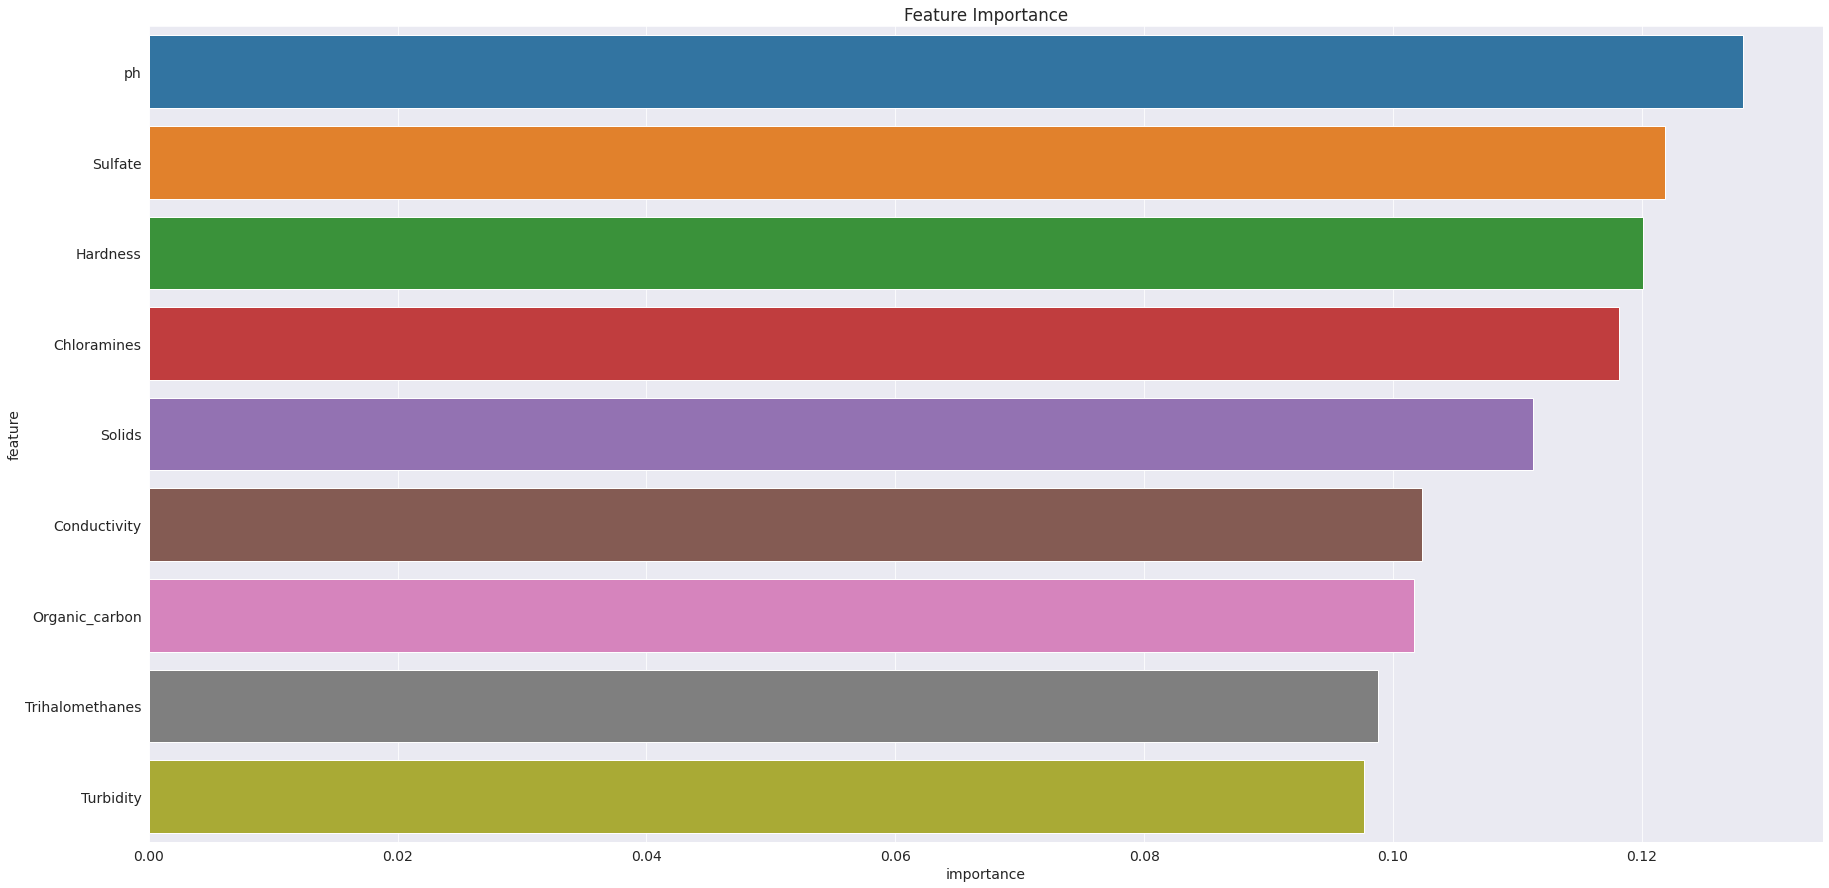

In [58]:
plt.figure(figsize=(30,15))

importance_df = pd.DataFrame({
    "feature": train_inputs.columns,
    "importance": RFC_model.feature_importances_
}).sort_values("importance", ascending=False)
plt.title("Feature Importance")
sns.barplot(data=importance_df.head(10), x="importance", y="feature")

In [59]:
importance_df

feature  importance
0               ph    0.128130
4          Sulfate    0.121830
1         Hardness    0.120122
3      Chloramines    0.118164
2           Solids    0.111233
5     Conductivity    0.102341
6   Organic_carbon    0.101711
7  Trihalomethanes    0.098831
8        Turbidity    0.097637

<strong>Second Model Training and Evaluation: XGBoost Classifier Model</strong>

In [60]:
from xgboost import XGBClassifier

In [61]:
?XGBClassifier

In [62]:
XGB_model = XGBClassifier(n_jobs=-1, random_state=42)

In [63]:
training_start = time.perf_counter()
XGB_model.fit(train_inputs[numeric_cols], train_targets)
training_end = time.perf_counter()

prediction_start = time.perf_counter()
train_preds = XGB_model.predict(train_inputs)
test_preds = XGB_model.predict(test_inputs)
val_preds = XGB_model.predict(val_inputs)
prediction_end = time.perf_counter()

test_accuracy_XGB = (test_preds == test_targets).sum().astype(float)/len(test_preds)*100
val_accuracy_XGB = (val_preds == val_targets).sum().astype(float)/len(val_preds)*100
train_accuracy_XGB = (train_preds == train_targets).sum().astype(float)/len(train_preds)*100

XGB_train_time = training_end - training_start
XGB_prediction_time = prediction_end - prediction_start
print("XGB's test accuracy is: %3.2f" % (test_accuracy_XGB))
print("XGB's validation accuracy is: %3.2f" % (val_accuracy_XGB))
print("XGB's train accuracy is: %3.2f" % (train_accuracy_XGB))
print("Time consumed for training: %4.3f" % (XGB_train_time))
print("Time consumed for prediction: %6.5f seconds" % (XGB_prediction_time))


/home/reymond/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:04:34] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGB's test accuracy is: 70.43
XGB's validation accuracy is: 67.99
XGB's train accuracy is: 99.16
Time consumed for training: 0.475
Time consumed for prediction: 0.01604 seconds


<AxesSubplot:title={'center':'Feature Importance'}, xlabel='importance', ylabel='feature'>

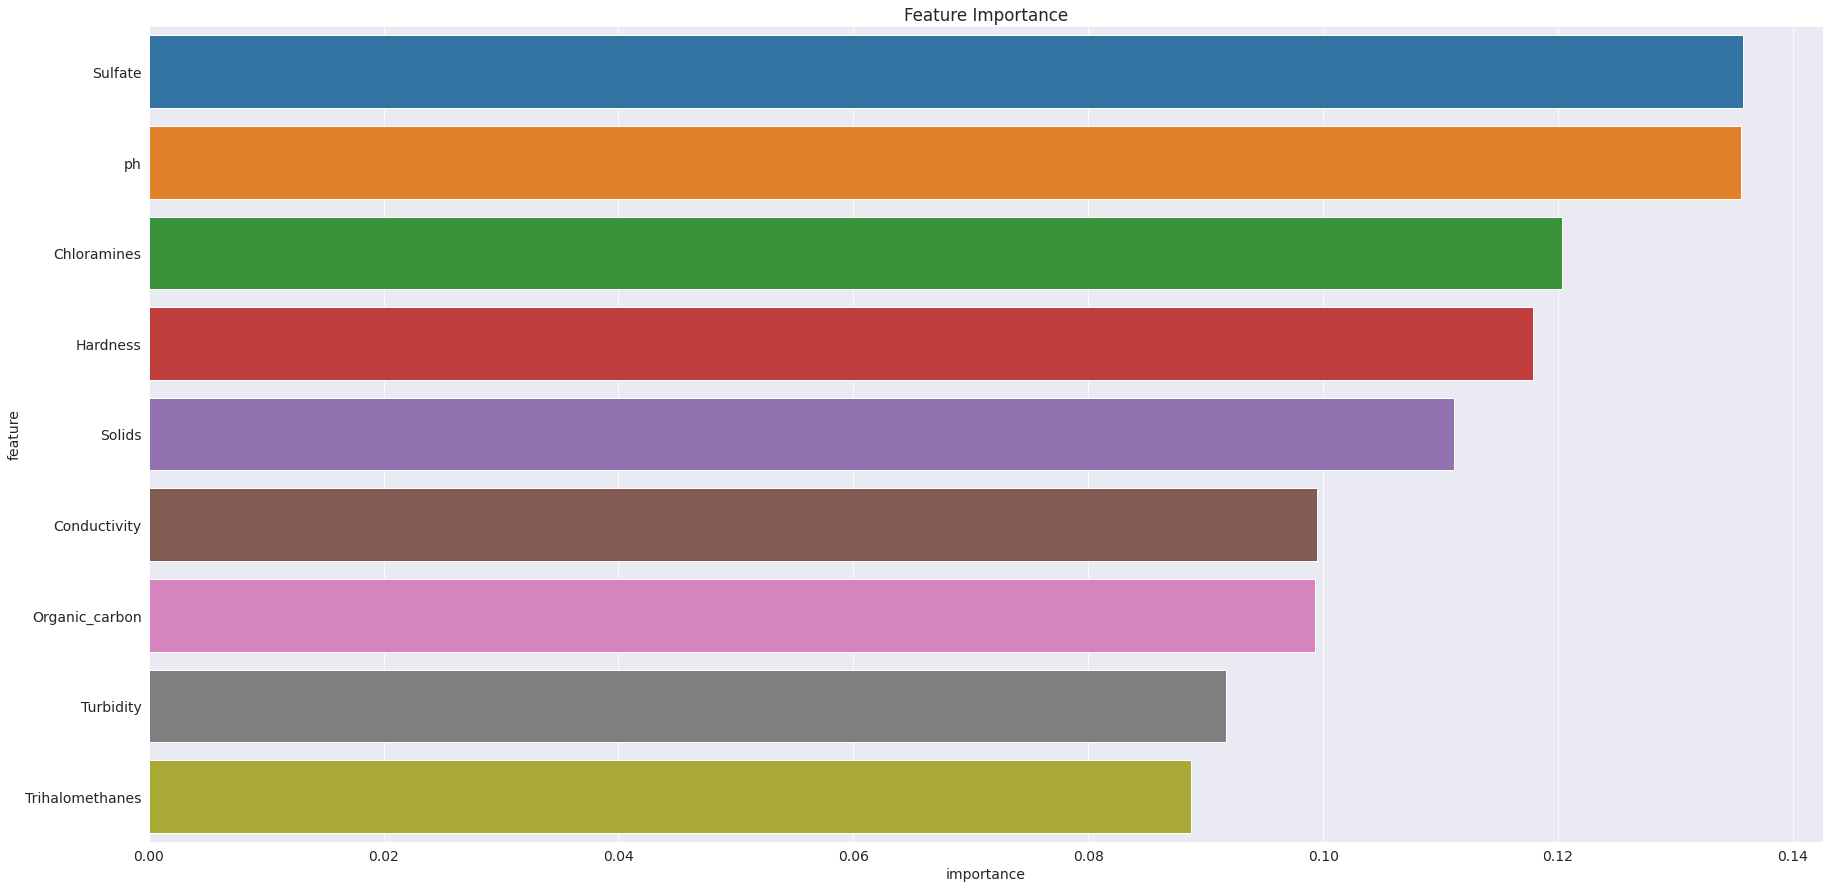

In [64]:
plt.figure(figsize=(30,15))

importance_df = pd.DataFrame({
    "feature": train_inputs.columns,
    "importance": XGB_model.feature_importances_
}).sort_values("importance", ascending=False)
plt.title("Feature Importance")
sns.barplot(data=importance_df.head(10), x="importance", y="feature")

In [65]:
importance_df

feature  importance
4          Sulfate    0.135745
0               ph    0.135555
3      Chloramines    0.120374
1         Hardness    0.117872
2           Solids    0.111163
5     Conductivity    0.099508
6   Organic_carbon    0.099276
8        Turbidity    0.091765
7  Trihalomethanes    0.088742

<strong>Third Model Training and Evaluation: Support Vector Machine Classifier Model</strong>

In [66]:
from sklearn.svm import SVC

In [67]:
?SVC

In [68]:
SVC_model = SVC(random_state=42)

In [69]:
training_start = time.perf_counter()
SVC_model.fit(train_inputs[numeric_cols], train_targets)
training_end = time.perf_counter()

prediction_start = time.perf_counter()
train_preds = SVC_model.predict(train_inputs)
test_preds = SVC_model.predict(test_inputs)
val_preds = SVC_model.predict(val_inputs)
prediction_end = time.perf_counter()

test_accuracy_SVC = (test_preds == test_targets).sum().astype(float)/len(test_preds)*100
val_accuracy_SVC = (val_preds == val_targets).sum().astype(float)/len(val_preds)*100
train_accuracy_SVC = (train_preds == train_targets).sum().astype(float)/len(train_preds)*100

SVC_train_time = training_end - training_start
SVC_prediction_time = prediction_end - prediction_start
print("SVC's test accuracy is: %3.2f" % (test_accuracy_SVC))
print("SVC's validation accuracy is: %3.2f" % (val_accuracy_SVC))
print("SVC's train accuracy is: %3.2f" % (train_accuracy_SVC))
print("Time consumed for training: %4.3f" % (SVC_train_time))
print("Time consumed for prediction: %6.5f seconds" % (SVC_prediction_time))

SVC's test accuracy is: 68.90
SVC's validation accuracy is: 67.07
SVC's train accuracy is: 70.65
Time consumed for training: 0.298
Time consumed for prediction: 0.33019 seconds


<strong>Hyperparameter Tuning for Each Model</strong>

<strong>First Model (RFC): Hyperparameter Tuning</strong>

In [70]:
def test_params_RFC(**params):
    model = RandomForestClassifier(random_state=42, n_jobs=-1, **params).fit(train_inputs, train_targets)
    
    train_preds = model.predict(train_inputs)
    val_preds = model.predict(val_inputs)
    
    val_accuracy = (val_preds == val_targets).sum().astype(float)/len(val_preds)*100
    train_accuracy = (train_preds == train_targets).sum().astype(float)/len(train_preds)*100
    return train_accuracy, val_accuracy

In [71]:
def test_param_and_plot_RFC(param_name, param_values):
    train_acc, val_acc = [], [] 
    for value in param_values:
        params = {param_name: value}
        train_accuracy, val_accuracy = test_params_RFC(**params)
        train_acc.append(train_accuracy)
        val_acc.append(val_accuracy)
    plt.figure(figsize=(10,6))
    plt.title('Overfitting curve: ' + param_name)
    plt.plot(param_values, train_acc, 'b-o')
    plt.plot(param_values, val_acc, 'r-o')
    plt.xlabel(param_name)
    plt.ylabel('Accuracy')
    plt.legend(['Training', 'Validation'])

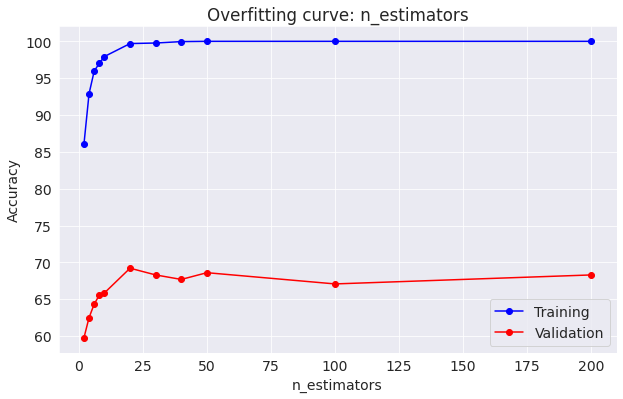

In [72]:
test_param_and_plot_RFC("n_estimators", [2,4,6,8,10,20,30,40,50,100,200])

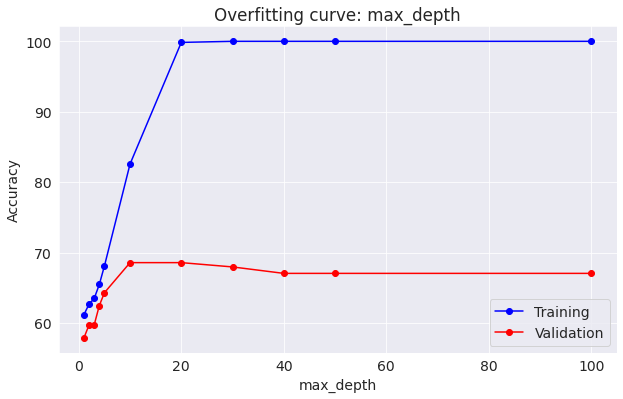

In [73]:
test_param_and_plot_RFC("max_depth", [1,2,3,4,5,10,20,30,40,50,100])

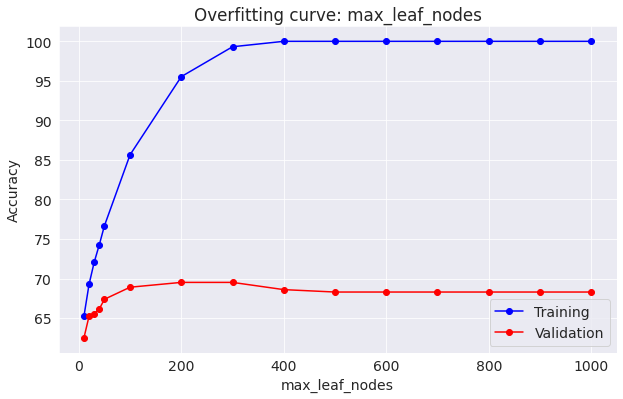

In [74]:
test_param_and_plot_RFC("max_leaf_nodes", [10,20,30,40,50,100,200,300,400,500,600,700,800,900,1000])

<strong>Second Model (XGB): Hyperparameter Tuning</strong>

In [75]:
def test_params_XGB(**params):
    model = XGBClassifier(random_state=42, n_jobs=-1, **params).fit(train_inputs, train_targets)
    
    train_preds = model.predict(train_inputs)
    val_preds = model.predict(val_inputs)
    
    val_accuracy = (val_preds == val_targets).sum().astype(float)/len(val_preds)*100
    train_accuracy = (train_preds == train_targets).sum().astype(float)/len(train_preds)*100
    return train_accuracy, val_accuracy

In [76]:
def test_param_and_plot_XGB(param_name, param_values):
    train_acc, val_acc = [], [] 
    for value in param_values:
        params = {param_name: value}
        train_accuracy, val_accuracy = test_params_XGB(**params)
        train_acc.append(train_accuracy)
        val_acc.append(val_accuracy)
    plt.figure(figsize=(10,6))
    plt.title('Overfitting curve: ' + param_name)
    plt.plot(param_values, train_acc, 'b-o')
    plt.plot(param_values, val_acc, 'r-o')
    plt.xlabel(param_name)
    plt.ylabel('Accuracy')
    plt.legend(['Training', 'Validation'])

/home/reymond/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/reymond/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/reymond/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:114

[19:05:00] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:05:01] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:05:01] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/reymond/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:05:01] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/reymond/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/reymond/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:05:01] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:05:01] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/reymond/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:05:02] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


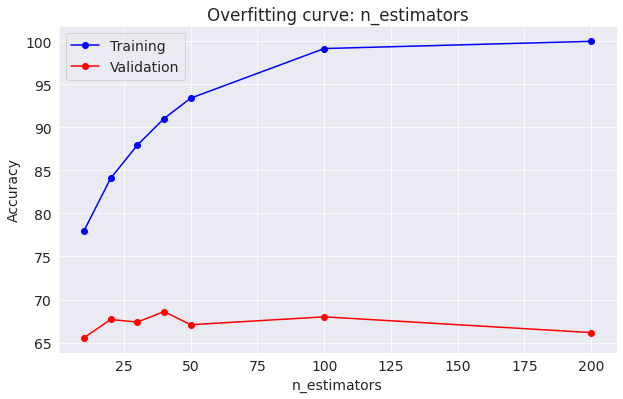

In [77]:
test_param_and_plot_XGB("n_estimators", [10,20,30,40,50,100,200])

/home/reymond/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:05:03] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/reymond/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:05:04] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/reymond/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:05:05] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/reymond/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:05:06] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/reymond/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:05:07] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/reymond/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:05:08] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/reymond/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:05:09] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


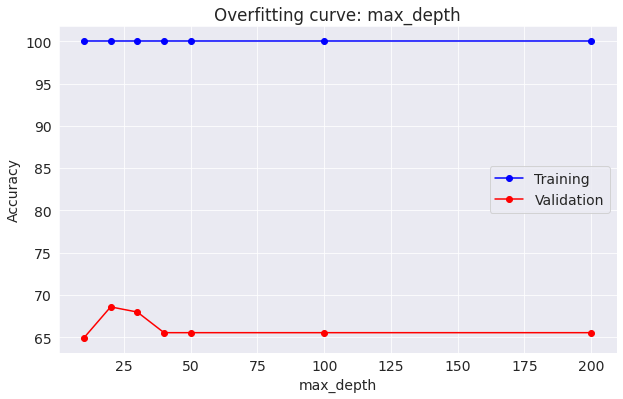

In [78]:
test_param_and_plot_XGB("max_depth", [10,20,30,40,50,100,200])

/home/reymond/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:05:10] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/reymond/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:05:11] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/reymond/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:05:11] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/reymond/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:05:11] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/reymond/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:05:12] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


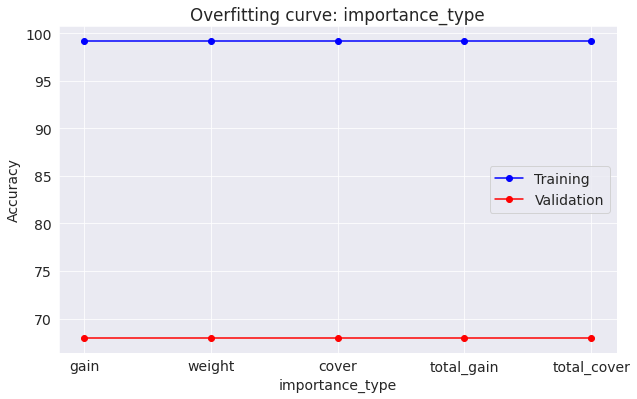

In [79]:
test_param_and_plot_XGB("importance_type", ["gain", "weight", "cover", "total_gain", "total_cover"])

<strong>Third Model (SVC): Hyperparameter Tuning</strong>

In [80]:
def test_params_SVC(**params):
    model = SVC(random_state=42, **params).fit(train_inputs, train_targets)
    
    train_preds = model.predict(train_inputs)
    val_preds = model.predict(val_inputs)
    
    val_accuracy = (val_preds == val_targets).sum().astype(float)/len(val_preds)*100
    train_accuracy = (train_preds == train_targets).sum().astype(float)/len(train_preds)*100
    return train_accuracy, val_accuracy

In [81]:
def test_param_and_plot_SVC(param_name, param_values):
    train_acc, val_acc = [], [] 
    for value in param_values:
        params = {param_name: value}
        train_accuracy, val_accuracy = test_params_SVC(**params)
        train_acc.append(train_accuracy)
        val_acc.append(val_accuracy)
    plt.figure(figsize=(10,6))
    plt.title('Overfitting curve: ' + param_name)
    plt.plot(param_values, train_acc, 'b-o')
    plt.plot(param_values, val_acc, 'r-o')
    plt.xlabel(param_name)
    plt.ylabel('Accuracy')
    plt.legend(['Training', 'Validation'])

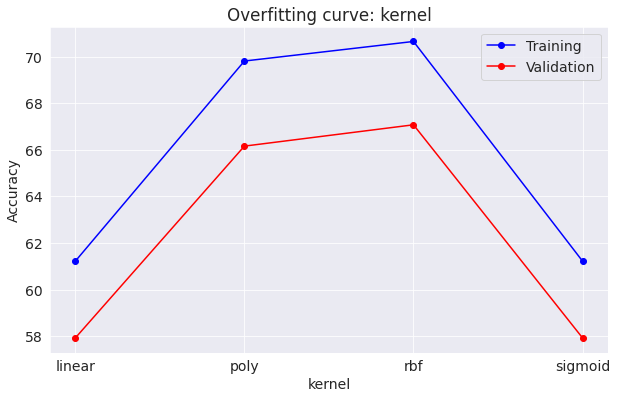

In [82]:
test_param_and_plot_SVC("kernel", ['linear', 'poly', 'rbf', 'sigmoid'])

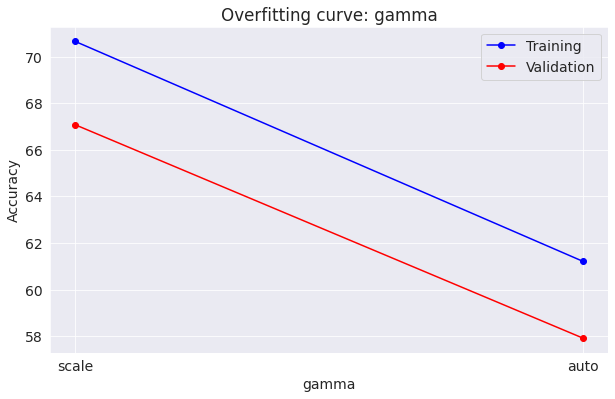

In [98]:
test_param_and_plot_SVC("gamma", ['scale', 'auto'])

<strong>Training the Best Model After Hyperparameter Tuning</strong>

<strong>First Model Training and Evaluation: Tuned Random Forest Classifier Model</strong>

In [83]:
Tuned_RFC_model = RandomForestClassifier(max_depth=10, max_leaf_nodes=200, n_jobs=-1, random_state=42)

In [84]:
import time
training_start = time.perf_counter()
Tuned_RFC_model.fit(train_inputs[numeric_cols], train_targets)
training_end = time.perf_counter()

prediction_start = time.perf_counter()
train_preds = Tuned_RFC_model.predict(train_inputs)
test_preds = Tuned_RFC_model.predict(test_inputs)
val_preds = Tuned_RFC_model.predict(val_inputs)
prediction_end = time.perf_counter()

test_accuracy_RFC = (test_preds == test_targets).sum().astype(float)/len(test_preds)*100
val_accuracy_RFC = (val_preds == val_targets).sum().astype(float)/len(val_preds)*100
train_accuracy_RFC = (train_preds == train_targets).sum().astype(float)/len(train_preds)*100

RFC_train_time = training_end - training_start
RFC_prediction_time = prediction_end - prediction_start
print("Tuned_RFC's test accuracy is: %3.2f" % (test_accuracy_RFC))
print("Tuned_RFC's validation accuracy is: %3.2f" % (val_accuracy_RFC))
print("Tuned_RFC's train accuracy is: %3.2f" % (train_accuracy_RFC))
print("Time consumed for training: %4.3f" % (RFC_train_time))
print("Time consumed for prediction: %6.5f seconds" % (RFC_prediction_time))


Tuned_RFC's test accuracy is: 70.12
Tuned_RFC's validation accuracy is: 67.38
Tuned_RFC's train accuracy is: 82.40
Time consumed for training: 0.364
Time consumed for prediction: 0.31849 seconds


<AxesSubplot:title={'center':'Feature Importance'}, xlabel='importance', ylabel='feature'>

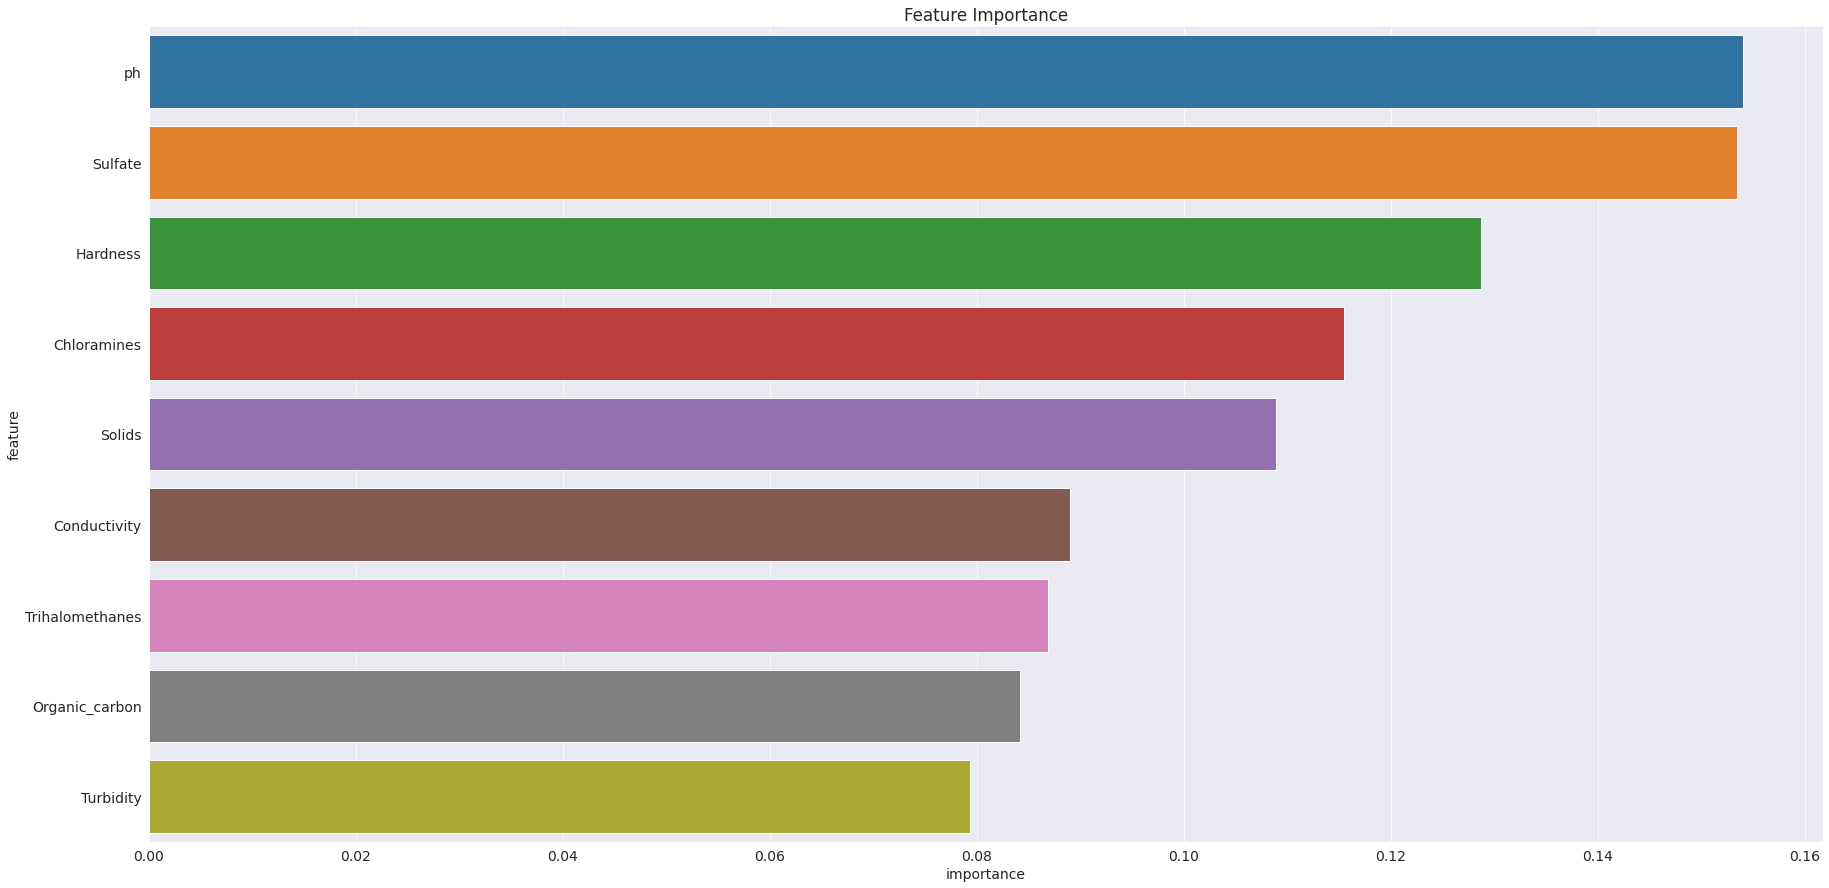

In [85]:
plt.figure(figsize=(30,15))

importance_df = pd.DataFrame({
    "feature": train_inputs.columns,
    "importance": Tuned_RFC_model.feature_importances_
}).sort_values("importance", ascending=False)
plt.title("Feature Importance")
sns.barplot(data=importance_df.head(10), x="importance", y="feature")

In [86]:
importance_df

feature  importance
0               ph    0.154014
4          Sulfate    0.153454
1         Hardness    0.128689
3      Chloramines    0.115506
2           Solids    0.108886
5     Conductivity    0.089035
7  Trihalomethanes    0.086875
6   Organic_carbon    0.084219
8        Turbidity    0.079323

<strong>Second Model Training and Evaluation: Tuned XGBoost Classifier Model</strong>

In [89]:
Tuned_XGB_model = XGBClassifier(n_jobs=-1, random_state=42)

In [93]:
training_start = time.perf_counter()
Tuned_XGB_model.fit(train_inputs[numeric_cols], train_targets)
training_end = time.perf_counter()

prediction_start = time.perf_counter()
train_preds = Tuned_XGB_model.predict(train_inputs)
test_preds = Tuned_XGB_model.predict(test_inputs)
val_preds = Tuned_XGB_model.predict(val_inputs)
prediction_end = time.perf_counter()

test_accuracy_XGB = (test_preds == test_targets).sum().astype(float)/len(test_preds)*100
val_accuracy_XGB = (val_preds == val_targets).sum().astype(float)/len(val_preds)*100
train_accuracy_XGB = (train_preds == train_targets).sum().astype(float)/len(train_preds)*100

XGB_train_time = training_end - training_start
XGB_prediction_time = prediction_end - prediction_start
print("Tuned_XGB's test accuracy is: %3.2f" % (test_accuracy_XGB))
print("Tuned_XGB's validation accuracy is: %3.2f" % (val_accuracy_XGB))
print("Tuned_XGB's train accuracy is: %3.2f" % (train_accuracy_XGB))
print("Time consumed for training: %4.3f" % (XGB_train_time))
print("Time consumed for prediction: %6.5f seconds" % (XGB_prediction_time))

/home/reymond/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:10:27] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Tuned_XGB's test accuracy is: 70.43
Tuned_XGB's validation accuracy is: 67.99
Tuned_XGB's train accuracy is: 99.16
Time consumed for training: 0.433
Time consumed for prediction: 0.00914 seconds


Hypertuning won't increase the test accuracy of the XGBoost Classifier model.

<AxesSubplot:title={'center':'Feature Importance'}, xlabel='importance', ylabel='feature'>

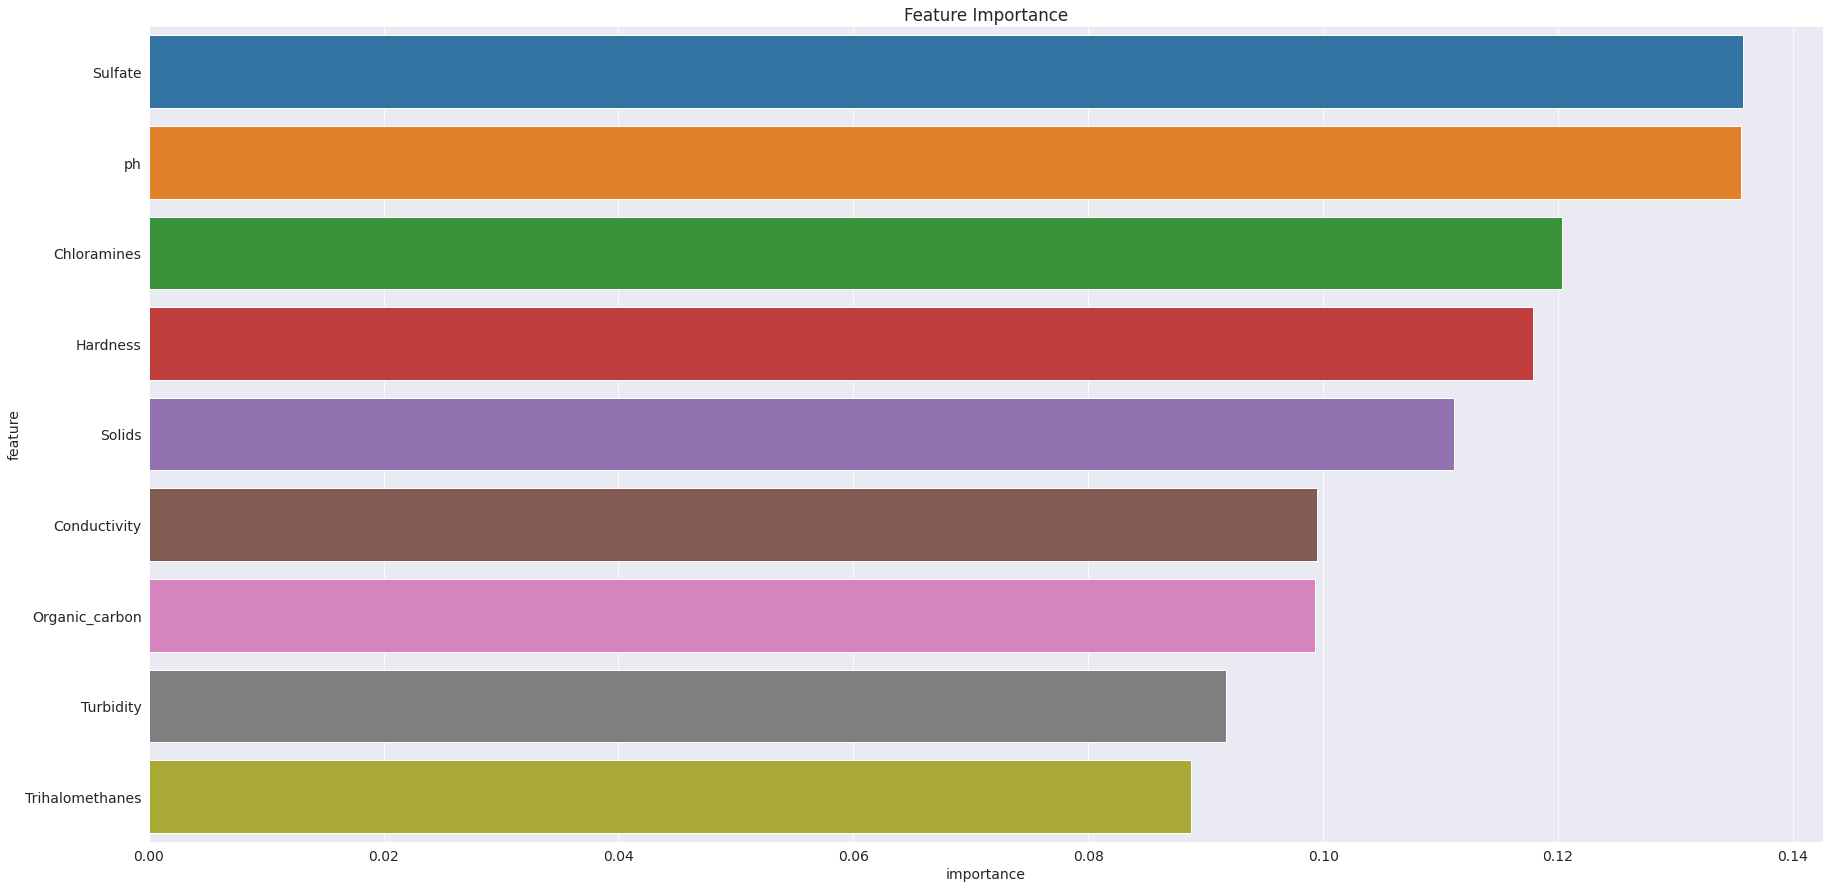

In [91]:
plt.figure(figsize=(30,15))

importance_df = pd.DataFrame({
    "feature": train_inputs.columns,
    "importance": Tuned_XGB_model.feature_importances_
}).sort_values("importance", ascending=False)
plt.title("Feature Importance")
sns.barplot(data=importance_df.head(10), x="importance", y="feature")

In [92]:
importance_df

feature  importance
4          Sulfate    0.135745
0               ph    0.135555
3      Chloramines    0.120374
1         Hardness    0.117872
2           Solids    0.111163
5     Conductivity    0.099508
6   Organic_carbon    0.099276
8        Turbidity    0.091765
7  Trihalomethanes    0.088742

<strong>Third Model Training and Evaluation: Tuned Support Vector Machine Classifier Model</strong>

In [107]:
Tuned_SVC_model = SVC(kernel="rbf", random_state=42)

In [108]:
training_start = time.perf_counter()
Tuned_SVC_model.fit(train_inputs[numeric_cols], train_targets)
training_end = time.perf_counter()

prediction_start = time.perf_counter()
train_preds = Tuned_SVC_model.predict(train_inputs)
test_preds = Tuned_SVC_model.predict(test_inputs)
val_preds = Tuned_SVC_model.predict(val_inputs)
prediction_end = time.perf_counter()

test_accuracy_SVC = (test_preds == test_targets).sum().astype(float)/len(test_preds)*100
val_accuracy_SVC = (val_preds == val_targets).sum().astype(float)/len(val_preds)*100
train_accuracy_SVC = (train_preds == train_targets).sum().astype(float)/len(train_preds)*100

SVC_train_time = training_end - training_start
SVC_prediction_time = prediction_end - prediction_start
print("Tuned_SVC's test accuracy is: %3.2f" % (test_accuracy_SVC))
print("Tuned_SVC's validation accuracy is: %3.2f" % (val_accuracy_SVC))
print("Tuned_SVC's train accuracy is: %3.2f" % (train_accuracy_SVC))
print("Time consumed for training: %4.3f" % (SVC_train_time))
print("Time consumed for prediction: %6.5f seconds" % (SVC_prediction_time))


Tuned_SVC's test accuracy is: 68.90
Tuned_SVC's validation accuracy is: 67.07
Tuned_SVC's train accuracy is: 70.65
Time consumed for training: 0.272
Time consumed for prediction: 0.32912 seconds


Hyperparameter tuning doesn't help the model to improve its accuracy on the test set. 

<strong>Conclusion</strong>